In [2]:
import pandas as pd

In [78]:
path="C:\\Users\\tusha\\Downloads\\UrbanSound8K\\metadata\\UrbanSound8K.csv"
df=pd.read_csv(path)

In [79]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [80]:
df.shape

(8732, 8)

In [81]:
df["class"].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
engine_idling       1000
street_music        1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [82]:
df.columns

Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')

In [83]:
df["slice_file_name"].astype(str)

0         100032-3-0-0.wav
1       100263-2-0-117.wav
2       100263-2-0-121.wav
3       100263-2-0-126.wav
4       100263-2-0-137.wav
               ...        
8727       99812-1-2-0.wav
8728       99812-1-3-0.wav
8729       99812-1-4-0.wav
8730       99812-1-5-0.wav
8731       99812-1-6-0.wav
Name: slice_file_name, Length: 8732, dtype: object

In [84]:
df["relative_path"]='/fold'+df["fold"].astype(str)+"/"+df["slice_file_name"].astype(str)

In [85]:
df=df[["relative_path","classID"]]
df

,relative_path,classID
0,/fold5/100032-3-0-0.wav,3
1,/fold5/100263-2-0-117.wav,2
2,/fold5/100263-2-0-121.wav,2
3,/fold5/100263-2-0-126.wav,2
4,/fold5/100263-2-0-137.wav,2
...,...,...
8727,/fold7/99812-1-2-0.wav,1
8728,/fold7/99812-1-3-0.wav,1
8729,/fold7/99812-1-4-0.wav,1
8730,/fold7/99812-1-5-0.wav,1


In [86]:
df.to_csv("relativepaths.csv",header=True,index=False)

In [1]:
import pandas as pd
df1=pd.read_csv("relativepaths.csv")
df1

,relative_path,classID
0,/fold5/100032-3-0-0.wav,3
1,/fold5/100263-2-0-117.wav,2
2,/fold5/100263-2-0-121.wav,2
3,/fold5/100263-2-0-126.wav,2
4,/fold5/100263-2-0-137.wav,2
...,...,...
8727,/fold7/99812-1-2-0.wav,1
8728,/fold7/99812-1-3-0.wav,1
8729,/fold7/99812-1-4-0.wav,1
8730,/fold7/99812-1-5-0.wav,1


In [150]:
import tensorflow as tf
import tensorflow_io as tfio

def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    n_mels, n_steps = spec.shape

    mask_value = tf.reduce_mean(spec)
    aug_spec = tf.identity(spec)

    freq_mask_param = tf.cast(max_mask_pct * n_mels, dtype=tf.int32)
    for _ in range(n_freq_masks):
        aug_spec = tfio.audio.freq_mask(aug_spec, param=freq_mask_param)

    time_mask_param = tf.cast(max_mask_pct * n_steps, dtype=tf.int32)
    for _ in range(n_time_masks):
        aug_spec = tfio.audio.time_mask(aug_spec, param=time_mask_param)

    return aug_spec


In [156]:
path="C:\\Users\\tusha\\Downloads\\UrbanSound8K\\audio\\fold9\\98859-7-2-4.wav"
sig, sr=librosa.load(path, sr=None, mono=False)
hop_len=512
n_fft=1024
n_mels=64
top_db=80
mel_signal = librosa.feature.melspectrogram(y=sig, sr=sr, hop_length=hop_len, n_fft=n_fft, n_mels=n_mels)
spectrogram = np.abs(mel_signal)
spec = librosa.power_to_db(spectrogram, top_db=top_db)

In [157]:
spec.shape

(2, 64, 345)

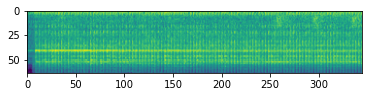

In [160]:
plt.figure()
plt.imshow(spec[0])

In [161]:
import numpy as np

def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    batch_size, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = np.copy(spec)

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
        mask_width = np.random.randint(0, freq_mask_param)
        start = np.random.randint(0, n_mels - mask_width)
        aug_spec[:, start:start + mask_width, :] = mask_value

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
        mask_width = np.random.randint(0, time_mask_param)
        start = np.random.randint(0, n_steps - mask_width)
        aug_spec[:, :, start:start + mask_width] = mask_value

    return aug_spec


In [ ]:
aug_spec=spectro_augment(spec)
plt.figure()
plt.imshow(aug_spec.numpy())

In [153]:
aug_spec=spectro_augment(spec[0])

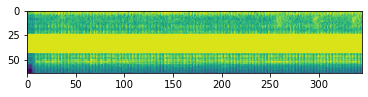

In [155]:
aug_spec.shape
plt.figure()
plt.imshow(aug_spec.numpy())

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [10]:
df=pd.read_csv("C:\\Users\\tusha\\OneDrive\\Documents\\Projects\\sound-classification\\relativepaths.csv")
X=df['relative_path']
y=df["classID"]
#split train\test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y,test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True,test_size=0.2, random_state=1)



In [11]:
for idx in X_val.index:
    print(df.loc[idx])

relative_path    /fold2/182739-2-0-17.wav
classID                                 2
Name: 4426, dtype: object
relative_path    /fold4/172338-9-0-39.wav
classID                                 9
Name: 3532, dtype: object
relative_path    /fold7/207216-2-0-137.wav
classID                                  2
Name: 5513, dtype: object
relative_path    /fold2/203128-3-6-0.wav
classID                                3
Name: 5262, dtype: object
relative_path    /fold7/107357-8-1-1.wav
classID                                8
Name: 518, dtype: object
relative_path    /fold2/155219-2-0-1.wav
classID                                2
Name: 2232, dtype: object
relative_path    /fold1/57320-0-0-33.wav
classID                                0
Name: 6865, dtype: object
relative_path    /fold4/24347-8-0-40.wav
classID                                8
Name: 5788, dtype: object
relative_path    /fold6/42955-9-0-19.wav
classID                                9
Name: 6451, dtype: object
relative_path    /fol

Name: 6584, dtype: object
relative_path    /fold7/201988-5-0-1.wav
classID                                5
Name: 5214, dtype: object
relative_path    /fold9/145683-6-1-0.wav
classID                                6
Name: 1820, dtype: object
relative_path    /fold4/151005-4-0-1.wav
classID                                4
Name: 2098, dtype: object
relative_path    /fold8/74677-0-0-57.wav
classID                                0
Name: 7796, dtype: object
relative_path    /fold4/7389-1-4-14.wav
classID                               1
Name: 7688, dtype: object
relative_path    /fold10/66115-1-0-1.wav
classID                                1
Name: 7250, dtype: object
relative_path    /fold3/94636-8-0-19.wav
classID                                8
Name: 8520, dtype: object
relative_path    /fold4/7389-1-4-6.wav
classID                              1
Name: 7694, dtype: object
relative_path    /fold6/162434-6-2-0.wav
classID                                6
Name: 3000, dtype: object
relative

relative_path    /fold7/99812-1-2-0.wav
classID                               1
Name: 8727, dtype: object
relative_path    /fold3/200161-3-7-0.wav
classID                                3
Name: 5163, dtype: object
relative_path    /fold3/159761-0-0-8.wav
classID                                0
Name: 2795, dtype: object
relative_path    /fold1/118963-3-0-0.wav
classID                                3
Name: 937, dtype: object
relative_path    /fold2/132073-1-0-0.wav
classID                                1
Name: 1307, dtype: object
relative_path    /fold3/199769-1-0-13.wav
classID                                 1
Name: 5139, dtype: object
relative_path    /fold6/137969-2-0-56.wav
classID                                 2
Name: 1556, dtype: object
relative_path    /fold10/188813-7-5-0.wav
classID                                 7
Name: 4669, dtype: object
relative_path    /fold1/132016-9-0-20.wav
classID                                 9
Name: 1291, dtype: object
relative_path    /fold9

Name: 2308, dtype: object
relative_path    /fold7/183894-1-6-0.wav
classID                                1
Name: 4442, dtype: object
relative_path    /fold9/152588-3-3-0.wav
classID                                3
Name: 2149, dtype: object
relative_path    /fold6/111386-5-0-7.wav
classID                                5
Name: 634, dtype: object
relative_path    /fold5/181725-3-0-22.wav
classID                                 3
Name: 4416, dtype: object
relative_path    /fold7/71866-9-0-3.wav
classID                               9
Name: 7476, dtype: object
relative_path    /fold4/60608-9-0-3.wav
classID                               9
Name: 7005, dtype: object
relative_path    /fold3/94636-8-0-7.wav
classID                               8
Name: 8528, dtype: object
relative_path    /fold5/100852-0-0-30.wav
classID                                 0
Name: 46, dtype: object
relative_path    /fold9/159755-8-0-1.wav
classID                                8
Name: 2784, dtype: object
relativ

Name: 3663, dtype: object
relative_path    /fold10/73524-0-0-126.wav
classID                                  0
Name: 7631, dtype: object
relative_path    /fold10/164377-9-1-3.wav
classID                                 9
Name: 3047, dtype: object
relative_path    /fold9/157866-8-0-26.wav
classID                                 8
Name: 2470, dtype: object
relative_path    /fold7/159708-6-3-0.wav
classID                                6
Name: 2605, dtype: object
relative_path    /fold2/34621-4-18-0.wav
classID                                4
Name: 6158, dtype: object
relative_path    /fold4/159752-8-1-0.wav
classID                                8
Name: 2766, dtype: object
relative_path    /fold3/179865-1-0-0.wav
classID                                1
Name: 4157, dtype: object
relative_path    /fold1/78360-4-0-23.wav
classID                                4
Name: 8074, dtype: object
relative_path    /fold10/101382-2-0-12.wav
classID                                  2
Name: 57, dtype:

relative_path    /fold7/101848-9-0-9.wav
classID                                9
Name: 99, dtype: object
relative_path    /fold10/162134-7-0-0.wav
classID                                 7
Name: 2900, dtype: object
relative_path    /fold5/13577-3-0-0.wav
classID                               3
Name: 1494, dtype: object
relative_path    /fold4/195969-0-0-24.wav
classID                                 0
Name: 5005, dtype: object
relative_path    /fold4/55018-0-0-102.wav
classID                                 0
Name: 6803, dtype: object
relative_path    /fold6/184805-0-0-64.wav
classID                                 0
Name: 4501, dtype: object
relative_path    /fold3/54067-2-0-33.wav
classID                                2
Name: 6714, dtype: object
relative_path    /fold8/133090-2-0-76.wav
classID                                 2
Name: 1365, dtype: object
relative_path    /fold5/162318-2-0-34.wav
classID                                 2
Name: 2964, dtype: object
relative_path    /fo

relative_path    /fold2/76091-6-4-0.wav
classID                               6
Name: 7941, dtype: object
relative_path    /fold7/127443-4-0-10.wav
classID                                 4
Name: 1155, dtype: object
relative_path    /fold3/37560-4-0-5.wav
classID                               4
Name: 6262, dtype: object
relative_path    /fold1/55020-4-0-6.wav
classID                               4
Name: 6837, dtype: object
relative_path    /fold6/135160-8-0-3.wav
classID                                8
Name: 1413, dtype: object
relative_path    /fold10/99192-4-0-15.wav
classID                                 4
Name: 8685, dtype: object
relative_path    /fold1/103258-5-0-13.wav
classID                                 5
Name: 242, dtype: object
relative_path    /fold7/107357-8-0-4.wav
classID                                8
Name: 512, dtype: object
relative_path    /fold7/202516-0-0-7.wav
classID                                0
Name: 5252, dtype: object
relative_path    /fold9/61250-

relative_path    /fold2/74507-0-0-14.wav
classID                                0
Name: 7754, dtype: object
relative_path    /fold8/26176-1-0-0.wav
classID                               1
Name: 5887, dtype: object
relative_path    /fold10/30344-3-0-1.wav
classID                                3
Name: 6056, dtype: object
relative_path    /fold6/204240-0-0-11.wav
classID                                 0
Name: 5392, dtype: object
relative_path    /fold7/118587-3-0-6.wav
classID                                3
Name: 933, dtype: object
relative_path    /fold7/50629-4-0-1.wav
classID                               4
Name: 6619, dtype: object
relative_path    /fold5/178260-7-3-11.wav
classID                                 7
Name: 4007, dtype: object
relative_path    /fold3/13230-0-0-23.wav
classID                                0
Name: 1338, dtype: object
relative_path    /fold7/71866-9-0-31.wav
classID                                9
Name: 7477, dtype: object
relative_path    /fold2/15974

relative_path    /fold7/127443-4-0-9.wav
classID                                4
Name: 1165, dtype: object
relative_path    /fold4/185709-0-0-4.wav
classID                                0
Name: 4541, dtype: object
relative_path    /fold10/162134-7-17-3.wav
classID                                  7
Name: 2939, dtype: object
relative_path    /fold6/94632-5-0-31.wav
classID                                5
Name: 8490, dtype: object
relative_path    /fold6/194321-9-0-150.wav
classID                                  9
Name: 4918, dtype: object
relative_path    /fold1/165645-4-1-0.wav
classID                                4
Name: 3157, dtype: object
relative_path    /fold7/77751-7-9-0.wav
classID                               7
Name: 8014, dtype: object
relative_path    /fold10/73524-0-0-6.wav
classID                                0
Name: 7644, dtype: object
relative_path    /fold1/146186-5-0-4.wav
classID                                5
Name: 1833, dtype: object
relative_path    /fold

relative_path    /fold8/174873-3-5-10.wav
classID                                 3
Name: 3644, dtype: object
relative_path    /fold6/169045-2-0-1.wav
classID                                2
Name: 3366, dtype: object
relative_path    /fold4/16692-5-0-3.wav
classID                               5
Name: 3203, dtype: object
relative_path    /fold1/174290-6-0-0.wav
classID                                6
Name: 3609, dtype: object
relative_path    /fold2/74458-9-0-5.wav
classID                               9
Name: 7740, dtype: object
relative_path    /fold3/103199-4-7-2.wav
classID                                4
Name: 216, dtype: object
relative_path    /fold3/188824-7-6-0.wav
classID                                7
Name: 4700, dtype: object
relative_path    /fold8/91209-5-1-4.wav
classID                               5
Name: 8412, dtype: object
relative_path    /fold3/62837-7-0-21.wav
classID                                7
Name: 7111, dtype: object
relative_path    /fold10/171478-9

relative_path    /fold8/71177-8-1-2.wav
classID                               8
Name: 7435, dtype: object
relative_path    /fold3/17973-2-0-9.wav
classID                               2
Name: 4150, dtype: object
relative_path    /fold1/174276-7-6-0.wav
classID                                7
Name: 3591, dtype: object
relative_path    /fold9/116483-3-0-1.wav
classID                                3
Name: 829, dtype: object
relative_path    /fold6/30206-7-0-7.wav
classID                               7
Name: 6048, dtype: object
relative_path    /fold8/74677-0-0-134.wav
classID                                 0
Name: 7783, dtype: object
relative_path    /fold9/39532-4-3-0.wav
classID                               4
Name: 6278, dtype: object
relative_path    /fold5/34771-3-0-4.wav
classID                               3
Name: 6185, dtype: object
relative_path    /fold5/34771-3-0-5.wav
classID                               3
Name: 6186, dtype: object
relative_path    /fold7/43805-8-0-0.wav

relative_path    /fold3/146714-0-0-2.wav
classID                                0
Name: 1896, dtype: object
relative_path    /fold3/13230-0-0-11.wav
classID                                0
Name: 1328, dtype: object
relative_path    /fold3/22601-8-0-7.wav
classID                               8
Name: 5639, dtype: object
relative_path    /fold9/119449-5-0-4.wav
classID                                5
Name: 948, dtype: object
relative_path    /fold10/172519-9-0-49.wav
classID                                  9
Name: 3543, dtype: object
relative_path    /fold3/22601-8-0-4.wav
classID                               8
Name: 5621, dtype: object
relative_path    /fold4/61790-9-0-20.wav
classID                                9
Name: 7052, dtype: object
relative_path    /fold3/185375-9-0-33.wav
classID                                 9
Name: 4525, dtype: object
relative_path    /fold9/99500-2-0-11.wav
classID                                2
Name: 8710, dtype: object
relative_path    /fold2/146

In [14]:
X_val

4426     /fold2/182739-2-0-17.wav
3532     /fold4/172338-9-0-39.wav
5513    /fold7/207216-2-0-137.wav
5262      /fold2/203128-3-6-0.wav
518       /fold7/107357-8-1-1.wav
                  ...            
4287      /fold9/180156-1-6-0.wav
5395     /fold6/204240-0-0-14.wav
2535      /fold8/157868-8-0-9.wav
6118       /fold9/33641-3-8-0.wav
3694       /fold5/17578-5-0-5.wav
Name: relative_path, Length: 1397, dtype: object

In [15]:
x=np.zeros((2,64,688))
print(x.shape)
y=np.moveaxis(x,0,-1)
print(y.shape)
exd=np.expand_dims(y,axis=0)
print(exd.shape)
x2=np.ones((64,688,2))
print(x2.shape)

(2, 64, 688)
(64, 688, 2)
(1, 64, 688, 2)
(64, 688, 2)


In [18]:
exd2=np.expand_dims(x2,axis=0)
print(exd.shape)
res=np.concatenate((exd,exd2),axis=0)
print(res.shape)


(1, 64, 688, 2)
(2, 64, 688, 2)


In [21]:
class_id=3
class_labels=np.array([1,2,3],ndmin=1)
print(class_labels.shape)
class_labels

(3,)


array([1, 2, 3])

In [24]:
a=np.array([])

In [25]:
a.shape

(0,)

In [26]:
b=np.append(a,res)
b.shape

(176128,)

In [ ]:
z=np.zeros((64,68,2))

In [27]:
res.shape

(2, 64, 688, 2)

In [28]:
res[1:].shape

(1, 64, 688, 2)

In [31]:
res[0:1]

array([[[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]]]])

In [32]:
X_train.head(36)

2274    /fold10/155262-2-0-15.wav
936       /fold2/118962-3-0-0.wav
8497      /fold6/94632-5-1-13.wav
3712      /fold4/175855-1-0-0.wav
6815     /fold4/55018-0-0-246.wav
7744       /fold2/74458-9-1-5.wav
2108      /fold4/151005-4-3-2.wav
6143       /fold7/34241-1-1-0.wav
5326      /fold2/203929-7-3-2.wav
4658    /fold10/188813-7-10-0.wav
851      /fold8/117181-8-0-10.wav
1989     /fold2/147926-0-0-21.wav
6793       /fold9/54976-4-0-8.wav
3665     /fold7/175296-2-0-76.wav
6967       /fold1/59277-0-0-2.wav
8388       /fold5/90013-7-1-4.wav
4902    /fold8/193699-2-0-109.wav
808     /fold10/115418-9-0-11.wav
3358     /fold3/169044-2-0-10.wav
8439      /fold2/93193-9-1-19.wav
7705       /fold2/74226-9-0-0.wav
3571     /fold2/173995-3-0-11.wav
7158      /fold3/62837-7-1-62.wav
2919    /fold10/162134-7-12-3.wav
7291       /fold6/66623-4-0-1.wav
5690      /fold4/22883-7-71-0.wav
3424       /fold8/17009-2-0-1.wav
1685     /fold4/144007-5-0-15.wav
2100      /fold4/151005-4-0-3.wav
5756      /fol

In [3]:
import librosa
path="C:\\Users\\tusha\\Downloads\\UrbanSound8K\\audio/fold1/150341-3-1-0.wav"
sig, sr=librosa.load(path, sr=None, mono=False)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
sig.shape

(19647,)

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\tusha\\OneDrive\\Documents\\Projects\\sound-classification\\relativepaths.csv")
X=df['relative_path']

In [6]:
import librosa
n=0
defect_paths=[]
for each in X:
    path="C:\\Users\\tusha\\Downloads\\UrbanSound8K\\audio"+each
    sig, sr=librosa.load(path, sr=None, mono=False)
    if sig.shape[0]!=1 and sig.shape[0]!=2:
        print(n)
        print(path)
        defect_paths.append(path)
        print(sig.shape)
        n+=1


0
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/101415-3-0-2.wav
(192000,)
1
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/101415-3-0-3.wav
(192000,)
2
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/101415-3-0-8.wav
(192000,)
3
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/102547-3-0-2.wav
(192000,)
4
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/102547-3-0-7.wav
(192000,)
5
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/102547-3-0-8.wav
(192000,)
6
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/103076-3-0-0.wav
(121305,)
7
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/103076-3-1-0.wav
(46485,)
8
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/103076-3-2-0.wav
(21600,)
9
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold3/103357-4-0-0.wav
(192000,)
10
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold3/103357-4-0-1.wav
(192000,)
11
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/104327-2-0-15.wav
(192000,)
12
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold

104
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold9/127538-4-1-0.wav
(176400,)
105
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold9/127538-4-2-0.wav
(176400,)
106
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/127872-0-0-0.wav
(119924,)
107
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/127873-0-0-0.wav
(97920,)
108
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold9/12812-5-0-0.wav
(176400,)
109
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold9/12812-5-0-1.wav
(176400,)
110
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold9/12812-5-0-2.wav
(176400,)
111
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/128465-1-0-0.wav
(192000,)
112
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/128465-1-0-1.wav
(192000,)
113
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/128465-1-0-2.wav
(192000,)
114
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/128465-1-0-3.wav
(192000,)
115
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/128465-1-0-4.wav
(192000,)
116
C:\Users\tusha\Downloads\Urb

211
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/148632-8-0-5.wav
(192000,)
212
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/148632-8-0-6.wav
(192000,)
213
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/148632-8-0-7.wav
(192000,)
214
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/148632-8-0-8.wav
(192000,)
215
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/148632-8-0-9.wav
(192000,)
216
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/149177-6-0-0.wav
(36020,)
217
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/150341-3-0-0.wav
(21549,)
218
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/150341-3-1-0.wav
(19647,)
219
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold7/151065-6-0-0.wav
(70402,)
220
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/151069-6-0-0.wav
(81585,)
221
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold3/151071-6-0-0.wav
(76734,)
222
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold3/155309-3-0-0.wav
(13440,)
223
C:\Users\tusha\Downloads\UrbanS

318
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold4/159176-3-0-0.wav
(52038,)
319
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold3/161195-6-0-0.wav
(35277,)
320
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/162540-1-0-0.wav
(34560,)
321
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/162540-1-1-0.wav
(29760,)
322
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold1/162540-1-2-0.wav
(44683,)
323
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/162541-1-0-0.wav
(46761,)
324
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/162541-1-1-0.wav
(43124,)
325
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/162541-1-2-0.wav
(42085,)
326
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/163460-6-0-0.wav
(29547,)
327
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/164646-6-0-0.wav
(37761,)
328
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/164667-6-0-0.wav
(35813,)
329
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/164782-8-0-0.wav
(192000,)
330
C:\Users\tusha\Downloads\UrbanSoun

422
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/195063-4-0-0.wav
(176400,)
423
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/195063-4-1-0.wav
(176400,)
424
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/197243-3-0-0.wav
(60480,)
425
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/197243-3-1-0.wav
(55680,)
426
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold4/202517-0-0-0.wav
(192000,)
427
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/204773-3-7-1.wav
(192000,)
428
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/204773-3-8-0.wav
(192000,)
429
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/204773-3-9-0.wav
(192000,)
430
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold2/204773-3-9-1.wav
(192000,)
431
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/208030-3-0-0.wav
(85510,)
432
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/208030-3-1-0.wav
(60321,)
433
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold6/208030-3-2-0.wav
(55018,)
434
C:\Users\tusha\Downloads\Ur

526
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold4/63932-3-0-1.wav
(176400,)
527
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold4/63932-3-0-2.wav
(176400,)
528
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold4/63932-3-1-0.wav
(176400,)
529
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold4/63932-3-1-1.wav
(176400,)
530
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/65381-3-0-3.wav
(176400,)
531
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/65381-3-0-6.wav
(176400,)
532
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/65381-3-0-7.wav
(176400,)
533
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/66587-3-0-0.wav
(22776,)
534
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/66587-3-1-0.wav
(15435,)
535
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/66587-3-2-0.wav
(22776,)
536
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/66587-3-3-0.wav
(21510,)
537
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold8/68080-7-0-0.wav
(176400,)
538
C:\Users\tusha\Downloads\UrbanSound8K\au

633
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold9/76640-3-0-0.wav
(176400,)
634
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/77233-3-0-105.wav
(176400,)
635
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/77233-3-0-67.wav
(176400,)
636
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/77233-3-0-7.wav
(176400,)
637
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold5/77233-3-0-79.wav
(176400,)
638
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/77901-9-0-0.wav
(176400,)
639
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/77901-9-0-1.wav
(176400,)
640
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/77901-9-0-2.wav
(176400,)
641
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/77901-9-0-3.wav
(176400,)
642
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/77901-9-0-4.wav
(176400,)
643
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/77901-9-0-6.wav
(176400,)
644
C:\Users\tusha\Downloads\UrbanSound8K\audio/fold10/77901-9-0-7.wav
(176400,)
645
C:\Users\tusha\Downloads\

In [7]:
len(defect_paths)

739

In [9]:
import librosa
path="C:\\Users\\tusha\\Downloads\\UrbanSound8K\\audio/fold7/177729-0-0-68.wav"
sig, sr=librosa.load(path, sr=None, mono=False)
print(sig.shape)
print(sr)

(2, 192000)
48000


In [10]:
path=defect_paths[0]
sig, sr=librosa.load(path, sr=None, mono=False)
print(sig.shape)
print(sr)

(192000,)
48000


In [12]:
import numpy as np
sig1=np.expand_dims(sig,axis=0)
print(sig1.shape)

(1, 192000)


In [13]:
print(sig)

[-0.00015259 -0.00015259 -0.00018311 ... -0.0480957  -0.04779053
 -0.04751587]


In [14]:
print(sig1)

[[-0.00015259 -0.00015259 -0.00018311 ... -0.0480957  -0.04779053
  -0.04751587]]


In [13]:
def process_data(path):
    new_path="_________"+path
    return new_path


import tensorflow as tf
file_paths = ["path/to/file1.wav", "path/to/file2.wav"]

# Create a TensorFlow dataset from the file paths
dataset = tf.data.Dataset.from_tensor_slices(file_paths)
print(dataset)

for path in dataset:
    print(path)

print(dataset)

for path in dataset:
    file_path = path.numpy().decode('utf-8')
    print(file_path)
    


dataset=dataset.map(process_data)
print(dataset)

for new_path in dataset:
    print(new_path)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
tf.Tensor(b'path/to/file1.wav', shape=(), dtype=string)
tf.Tensor(b'path/to/file2.wav', shape=(), dtype=string)
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
path/to/file1.wav
path/to/file2.wav
<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
tf.Tensor(b'_________path/to/file1.wav', shape=(), dtype=string)
tf.Tensor(b'_________path/to/file2.wav', shape=(), dtype=string)


In [2]:
import pandas as pd
#read path csv
df=pd.read_csv("C:\\Users\\tusha\\OneDrive\\Documents\\Projects\\sound-classification\\relativepaths.csv")
X=df['relative_path']
y=df["classID"]

In [13]:
folds={}
for path, idx in zip(X,X.index):
    if path.split("/")[1] in folds:
        folds[path.split("/")[1]].append(idx)
    else:
        folds[path.split("/")[1]]=[idx]
        
for key, value in folds.items():
    print(key)

fold5
fold10
fold2
fold6
fold1
fold9
fold7
fold4
fold3
fold8


In [16]:
print(len(folds["fold10"]))
print(len(folds["fold1"]))
print(len(folds["fold2"]))
print(len(folds["fold3"]))

837
873
888
925


In [40]:
x=[1,2,3]
print(x)
x.append([4,5,6])
print(x)

[1, 2, 3]
[1, 2, 3, [4, 5, 6]]


In [35]:
print(list(folds.keys()))

['fold5', 'fold10', 'fold2', 'fold6', 'fold1', 'fold9', 'fold7', 'fold4', 'fold3', 'fold8']


In [37]:
l=[i for i in list(folds.keys()) if i!="fold10"]
print(l)

['fold5', 'fold2', 'fold6', 'fold1', 'fold9', 'fold7', 'fold4', 'fold3', 'fold8']


AttributeError: 'list' object has no attribute 'values'